In [1]:
from datetime import date, timedelta
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from src.core.repositories.stock_repository import get_repository, StockRepositoryConfig
from server.config import config as server_config
from src.core.lib.analysis.returns import returns

In [3]:
start = date.today() - timedelta(weeks=52)
end = date.today()

In [4]:
iex_config = server_config['sandbox']['iexcloud']
mysql_config = server_config['sandbox']['db']

In [5]:
repo = get_repository(iex_config=iex_config, mysql_config=mysql_config)

In [6]:
sbux = repo.historical_daily('SBUX', start=start, end=end)

In [7]:
sbux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       251 non-null    int64         
 1   symbol                   251 non-null    object        
 2   high                     251 non-null    float64       
 3   low                      251 non-null    float64       
 4   open                     251 non-null    float64       
 5   close                    251 non-null    float64       
 6   volume                   251 non-null    int64         
 7   u_high                   251 non-null    float64       
 8   u_low                    251 non-null    float64       
 9   u_close                  251 non-null    float64       
 10  u_volume                 251 non-null    int64         
 11  date                     251 non-null    datetime64[ns]
 12  change                   251 non-nul

<AxesSubplot:>

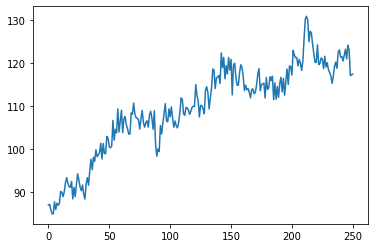

In [8]:
sbux['close'].plot()

In [9]:
sbux['prev_close'] = sbux['close'].shift(1)

In [10]:
sbux['return'] = sbux['close'] / sbux['prev_close'] - 1

<AxesSubplot:>

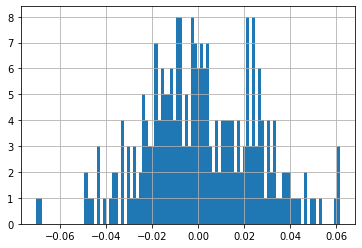

In [11]:
sbux['return'].hist(bins=100)

In [12]:
sbux['return'].mean(), sbux['return'].std()

(0.0014814029530206914, 0.02390181990030889)

In [13]:
sbux['log_return'] = np.log(sbux['return'].astype(float) + 1)

<AxesSubplot:>

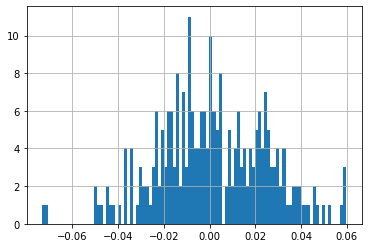

In [14]:
sbux['log_return'].hist(bins=100)

In [15]:
x_list = np.linspace(sbux['return'].min(), sbux['return'].max(), 100)
y_list = norm.pdf(x_list, loc=sbux['return'].mean(), scale=sbux['return'].std())

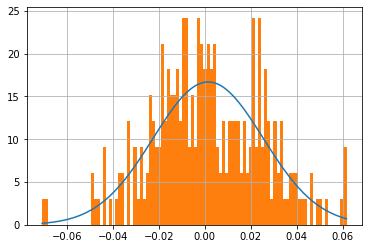

In [16]:
plt.plot(x_list, y_list);
sbux['return'].hist(bins=100, density=True);

In [17]:
import statsmodels.api as sm

/mnt/c/Users/Tim/src/money-printer/src/.venv/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


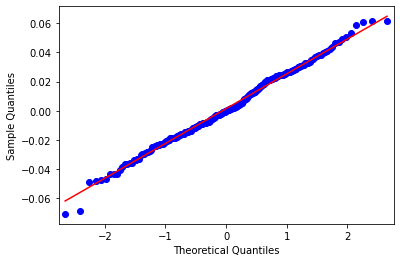

In [18]:
sm.qqplot(sbux['return'].astype(float).dropna(), line='s');

In [19]:
x_list_log = np.linspace(sbux['log_return'].min(), sbux['log_return'].max(), 100)
y_list_log = norm.pdf(x_list, loc=sbux['log_return'].mean(), scale=sbux['log_return'].std())

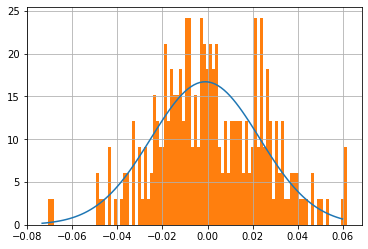

In [20]:
plt.plot(x_list_log, y_list_log);
sbux['return'].hist(bins=100, density=True);

/mnt/c/Users/Tim/src/money-printer/src/.venv/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


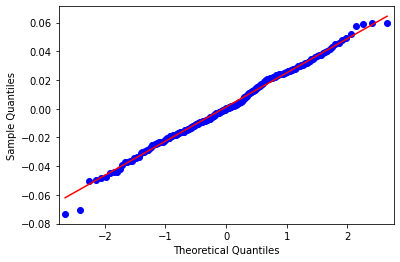

In [21]:
sm.qqplot(sbux['log_return'].astype(float).dropna(), line='s');